## Introduction:
    This kernel/noterbook contains the complete Exploratory Data Analysis, Feature Engeering, and Various Machine Learning
    techniques to detect if a transaction is fraud or not.
    This will also the contain various statistical aspects of dataset like skewness.etc.

## Importing the required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
import scipy.stats as stats

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

## Impoting the dataset:

In [2]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')

### Let's have look at the data:

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

We can see that all the data is in the numerical format and is continuous except for the **class** which is the dependent variable.

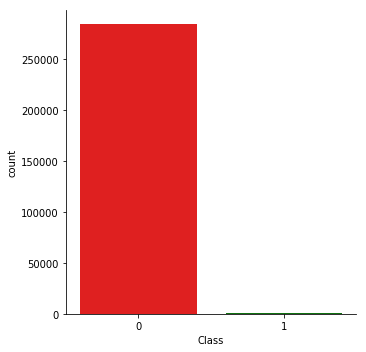

In [5]:
sns.factorplot(x='Class' , kind='count' , data=df , palette=['r','g'])

** Clearly the data is too unbalaced** . This can create example of accuracy paradox in which our accuracy is high but we'll be predicting all the 1's incorrectly.
#### To avoid this problem in this case we do the following things:
    We will change the performance metrics to **Confusion Matrix, F1 Score, Kappa, Roc curves**
    We will also try resampling and feature engineering.

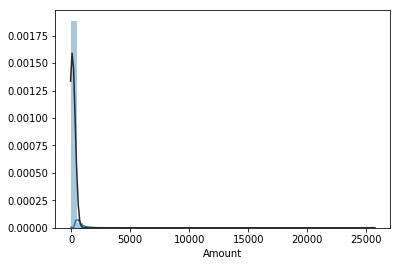

In [6]:
sns.distplot(df['Amount'],fit=stats.norm)

Clearly the **Amount** variable is not normalized, so we'll normalize it frist.

In [7]:
from sklearn.preprocessing import StandardScaler
df['normAmount'] = StandardScaler().fit_transform(df[['Amount']])
df = df.drop(['Amount'],axis=1)

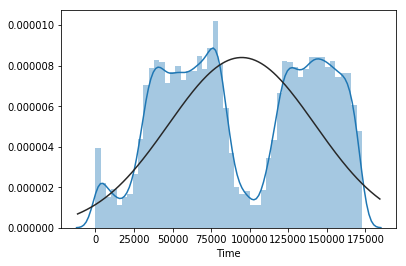

In [8]:
sns.distplot(df['Time'],fit=stats.norm)

**Time variable is also not normalized**. So we have to do the same thing for Time variable.

In [9]:
df['normTime'] = StandardScaler().fit_transform(df[['Time']])
df = df.drop(['Time'],axis=1)

In [10]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,normAmount,normTime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


## Resampling:
    We will resample the data in train data will be split into the 50:50 ratio. We have to use the undersampling techbique.

In [11]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Therefore we have to split the data into 492 equally sized sample.

In [12]:
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
# Shuffle dataframe rows
ndf = normal_distributed_df.sample(frac=1, random_state=42)

ndf.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,normAmount,normTime
121,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,-0.291864,0.064800,...,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,0,-0.316767,-1.994962
248296,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,-4.230984,...,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1,-0.353229,1.243705
239,1.171439,0.474974,0.011761,1.264303,0.116234,-0.865986,0.554393,-0.276375,-0.471302,0.029104,...,0.278843,-0.097491,0.426278,0.744938,-0.274728,0.008472,0.015492,0,-0.273268,-1.993214
239501,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,...,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1,0.595357,1.165033
143336,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,...,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1,0.657967,-0.200658


### Now we have a completly balanced data. Let's verify it.

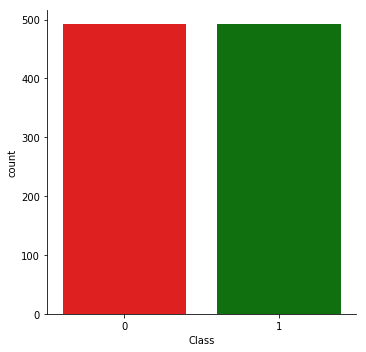

In [13]:
sns.factorplot(x='Class' , kind='count' , data=ndf , palette=['r','g'])

As we can see in the plot above the data is completly balanced.

## Let's see Correlation Matrix

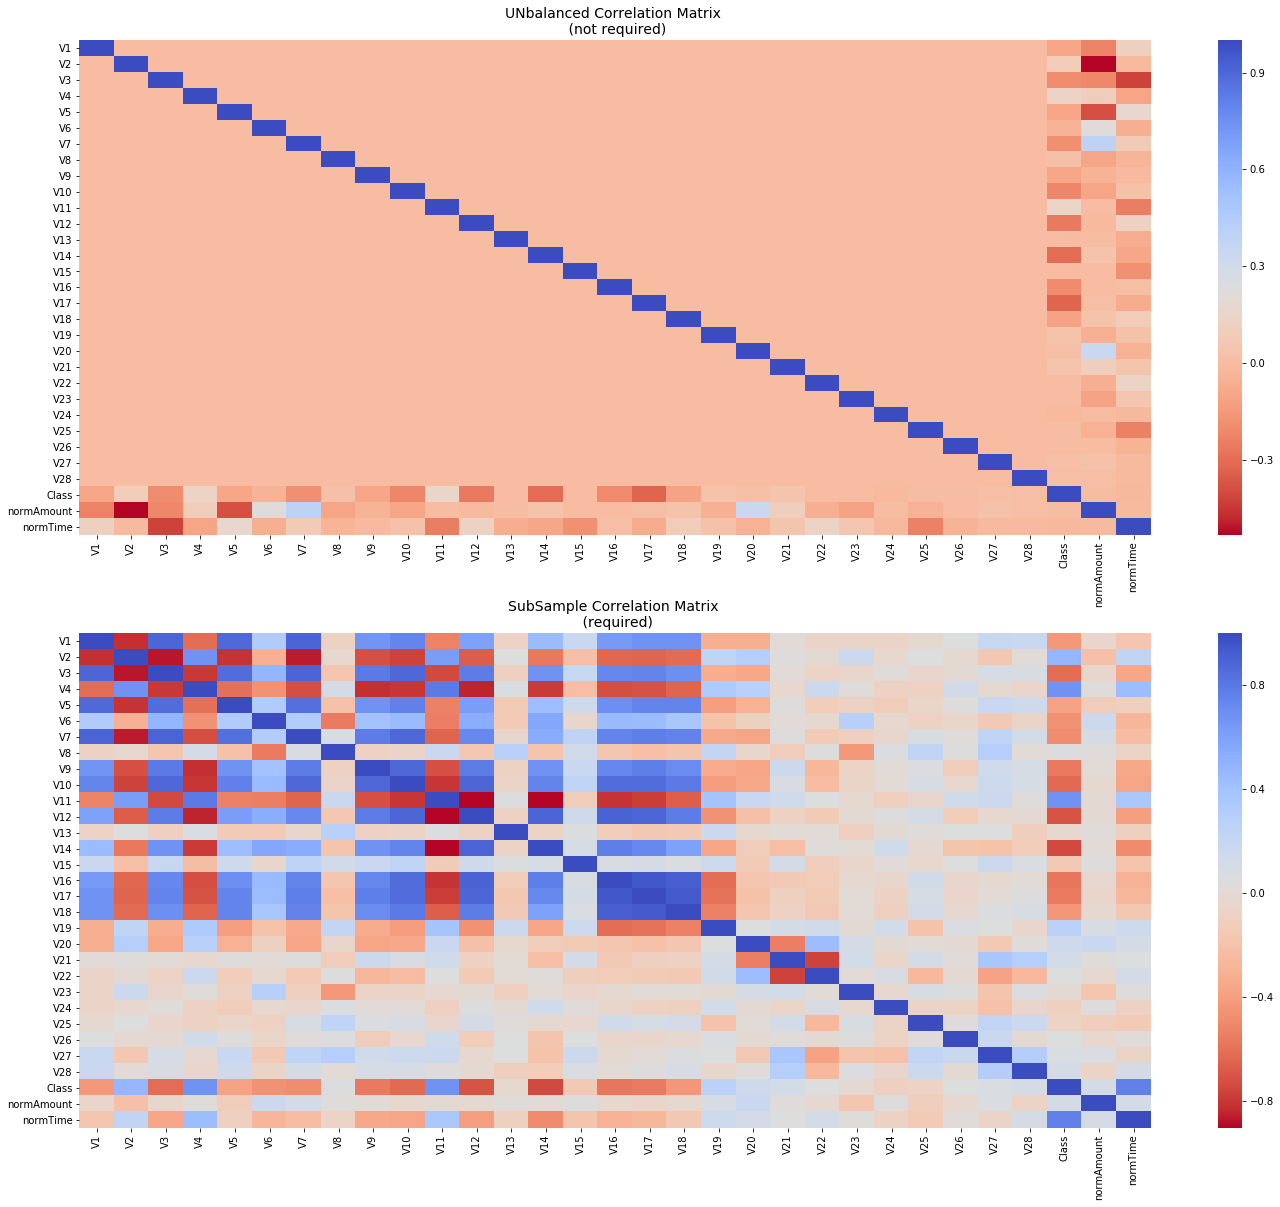

In [14]:
f, (g1, g2) = plt.subplots(2, 1, figsize=(24,20))

# Entire (Unbalanced) DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=g1)
g1.set_title("UNbalanced Correlation Matrix \n (not required)", fontsize=14)

# Balanced DataFramw
sub_sample_corr = ndf.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=g2)
g2.set_title('SubSample Correlation Matrix \n (required)', fontsize=14)
plt.show()

**Heatmap or the Correlation Matrix** is a very essential part of understanding data. It tells us about presence of negative and positive correlation among the variables and how significant this correlation is.
#### Inferences from above plot are:
  *  V17, V14, V12 and V10 are **negatively correlated**. Notice how the lower these values are, the more likely the end result will be a fraud transaction.
  * V2, V4, V11, and V19 are **positively correlated**. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

### Let's verify this with the help of BoxPlots

#### Negative Correlation :

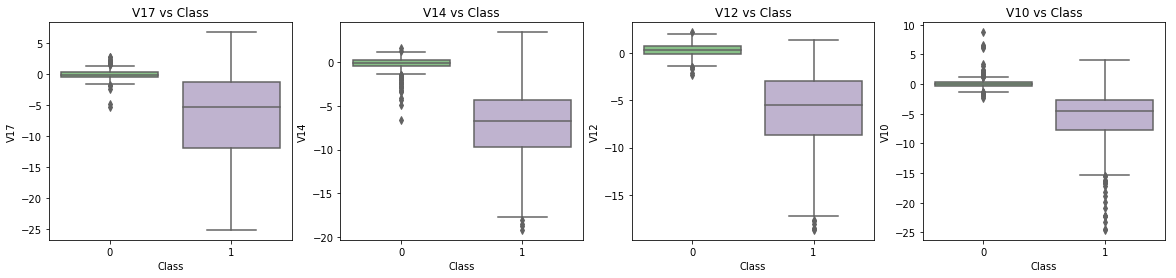

In [15]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=ndf, palette='Accent', ax=axes[0])
axes[0].set_title('V17 vs Class')

sns.boxplot(x="Class", y="V14", data=ndf, palette='Accent', ax=axes[1])
axes[1].set_title('V14 vs Class')


sns.boxplot(x="Class", y="V12", data=ndf, palette='Accent', ax=axes[2])
axes[2].set_title('V12 vs Class')


sns.boxplot(x="Class", y="V10", data=ndf, palette='Accent', ax=axes[3])
axes[3].set_title('V10 vs Class')

plt.show()

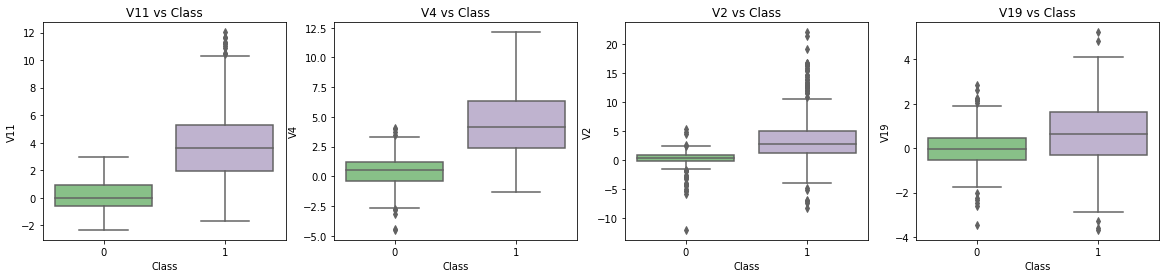

In [16]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V11", data=ndf, palette='Accent', ax=axes[0])
axes[0].set_title('V11 vs Class')

sns.boxplot(x="Class", y="V4", data=ndf, palette='Accent', ax=axes[1])
axes[1].set_title('V4 vs Class')


sns.boxplot(x="Class", y="V2", data=ndf, palette='Accent', ax=axes[2])
axes[2].set_title('V2 vs Class')


sns.boxplot(x="Class", y="V19", data=ndf, palette='Accent', ax=axes[3])
axes[3].set_title('V19 vs Class')

plt.show()

## Moving on to Classifiers:

### Splitting the data:

In [17]:
# for scaled dataframe
X_ndf = ndf.drop('Class', axis=1)
y_ndf = ndf['Class']
X_train_ndf, X_test_ndf, y_train_ndf, y_test_ndf = train_test_split(X_ndf, y_ndf, test_size=0.2, random_state=42)

# for unbalanced dataframe
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Converting these values to numpy arrayys

In [18]:
X_train_ndf = X_train_ndf.values
X_test_ndf = X_test_ndf.values
y_train_ndf = y_train_ndf.values
y_test_ndf = y_test_ndf.values

### Classifiers taken into account:

In [19]:
# Let's implement simple classifiers

classifiers = {
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

## K-Fold Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_train_ndf, y_train_ndf)
    training_score = cross_val_score(classifier, X_train_ndf, y_train_ndf, cv=10)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  SVC Has a training score of 96.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score


## Using Grid Search CV

In [21]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train_ndf, y_train_ndf)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train_ndf, y_train_ndf)

# tree best estimator
tree_clf = grid_tree.best_estimator_
# Overfitting Case
svc_score = cross_val_score(svc, X_train_ndf, y_train_ndf, cv=10)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train_ndf, y_train_ndf, cv=10)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Support Vector Classifier Cross Validation Score 99.36%
DecisionTree Classifier Cross Validation Score 99.88%


In [22]:
y_pred_ndf=grid_tree.predict(X_test_ndf)
from sklearn import metrics
metrics.accuracy_score(y_pred_ndf, y_test_ndf)

1.0

#### We get very impressive results.

In [23]:
tree_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### These are the best parameters.

## Fitting it whole data:

In [24]:
grid_tree.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3],
                         'min_samples_leaf': [5, 6]

## Making Predictions:

In [25]:
y_pred=grid_tree.predict(X_test)

## Plot ROC Curve

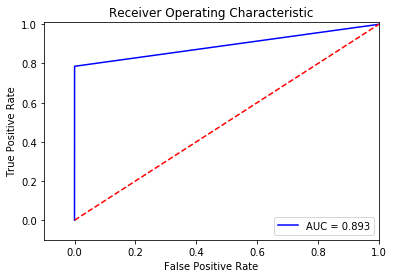

0.8927516279443685

In [27]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
y_pred = grid_tree.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_auc

### We have a quite good (almost 90%) area under the curve.

## Analyzing the performance metrics:

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred, normalize = True)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [29]:
print("\nconfusion_matrix{}\n".format(cm))
print("accuracy_score{}\n".format(accuracy))
print("precision_score{}\n".format(precision))
print("f1_score{}\n".format(f1))


confusion_matrix[[56852    12]
 [   21    77]]

accuracy_score0.999420666409185

precision_score0.8651685393258427

f1_score0.8235294117647058



## Thank You

### These are my results. Suggestions are always welcomed. Please Upvote/Star if you like my work.